Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipaddress

pd.set_option("display.max_columns", None)


Load Data

In [2]:
fraud = pd.read_csv("../data/raw/Fraud_Data.csv")
ip_country = pd.read_csv("../data/raw/IpAddress_to_Country.csv")

fraud.head()


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


Basic Inspection

In [3]:
fraud.info()
fraud.isnull().sum()
fraud.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


np.int64(0)

Data Cleaning

In [4]:
# Drop duplicates
fraud = fraud.drop_duplicates()

# Convert datetime columns
fraud["signup_time"] = pd.to_datetime(fraud["signup_time"])
fraud["purchase_time"] = pd.to_datetime(fraud["purchase_time"])

fraud.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  float64       
 10  class           151112 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 12.7+ MB


Class Imbalance Analysis

In [5]:
fraud["class"].value_counts(normalize=True) * 100


class
0    90.635423
1     9.364577
Name: proportion, dtype: float64

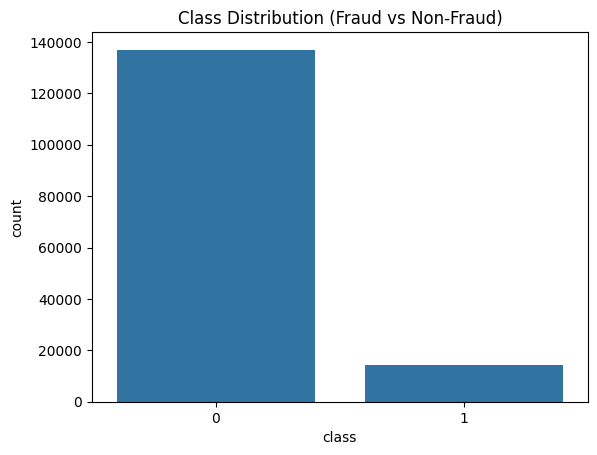

In [6]:
sns.countplot(x="class", data=fraud)
plt.title("Class Distribution (Fraud vs Non-Fraud)")
plt.show()


Univariate Analysis

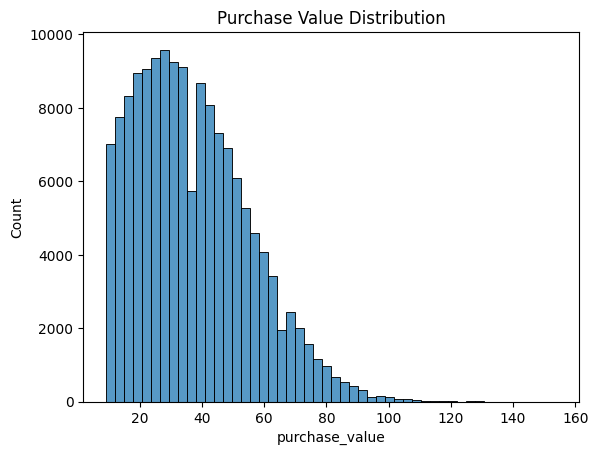

In [7]:
sns.histplot(fraud["purchase_value"], bins=50)
plt.title("Purchase Value Distribution")
plt.show()


Bivariate Analysis

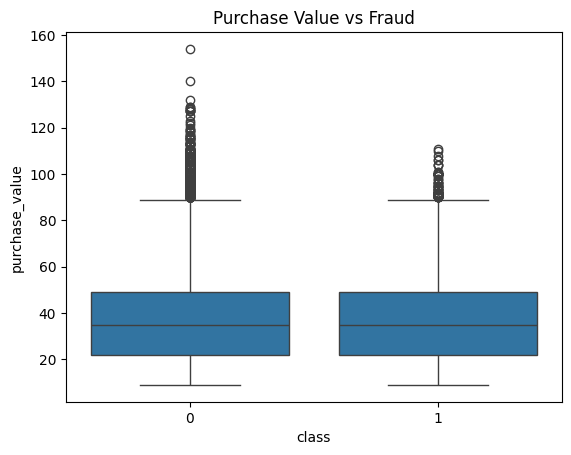

In [8]:
sns.boxplot(x="class", y="purchase_value", data=fraud)
plt.title("Purchase Value vs Fraud")
plt.show()


IP Conversion

In [14]:

def ip_to_int(ip):
    return int(ipaddress.ip_address(ip))

fraud["ip_int"] = fraud["ip_address"].astype(int)

# Convert country IP ranges to integer
ip_country["lower_bound_ip_address"] = ip_country["lower_bound_ip_address"].astype(int)
ip_country["upper_bound_ip_address"] = ip_country["upper_bound_ip_address"].astype(int)


IP to Country Merge

In [15]:
def find_country(ip):
    match = ip_country[
        (ip_country["lower_bound_ip_address"] <= ip) &
        (ip_country["upper_bound_ip_address"] >= ip)
    ]
    if len(match) > 0:
        return match.iloc[0]["country"]
    else:
        return "Unknown"

fraud["country"] = fraud["ip_int"].apply(find_country)


Fraud by Country

In [16]:
fraud.groupby("country")["class"].mean().sort_values(ascending=False).head(10)


country
Turkmenistan             1.000000
Namibia                  0.434783
Sri Lanka                0.419355
Luxembourg               0.388889
Virgin Islands (U.S.)    0.333333
Ecuador                  0.264151
Tunisia                  0.262712
Peru                     0.260504
Bolivia                  0.245283
Kuwait                   0.233333
Name: class, dtype: float64